In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset. Calendar shows the availability of a listing for a particular day
df = pd.read_csv('calendar.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
# Convert the 'dates' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [5]:
#drop duplicates
df_new = df.drop_duplicates().reset_index(drop=True)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308525 entries, 0 to 1308524
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308525 non-null  int64         
 1   date        1308525 non-null  datetime64[ns]
 2   available   1308525 non-null  object        
 3   price       642957 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


## Question: In which months did we have the highest occupancy rates (i.e peak period)?

In [7]:
# adding a month column to return the month based on date

df_new['month'] = df_new['date'].dt.month_name()

In [8]:
#reducing the dataset further. We are only interested in dates where availability column = 'f' (false)

df_newer = (df_new[df_new['available'] == 'f']).drop('price', axis = 1).reset_index(drop=True)

In [9]:
df_newer

,listing_id,date,available,month
0,12147973,2017-09-05,f,September
1,12147973,2017-09-04,f,September
2,12147973,2017-09-03,f,September
3,12147973,2017-09-02,f,September
4,12147973,2017-09-01,f,September
...,...,...,...,...
665563,14504422,2016-09-10,f,September
665564,14504422,2016-09-09,f,September
665565,14504422,2016-09-08,f,September
665566,14504422,2016-09-07,f,September


<Figure size 1000x600 with 0 Axes>

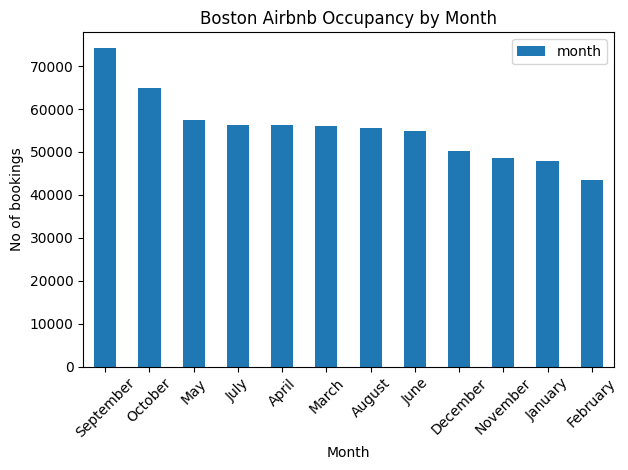

In [10]:
# Create a bar chart showing occupancy rates by month

count_series = pd.DataFrame(df_newer['month'].value_counts())


plt.figure(figsize=(10, 6))
count_series.plot(kind='bar')
plt.title('Boston Airbnb Occupancy by Month')
plt.xlabel('Month')
plt.ylabel('No of bookings')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [11]:
count_series

,month
September,74167
October,64821
May,57535
July,56172
April,56168
March,55954
August,55574
June,54819
December,50142
November,48692


Within a one year period from September 06 2016 to September 05 2017, September 2016 had the highest number of bookings at 74167 and February 2017 is at the bottom of the list at 43570 which is 42% less than the number in September.